In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score

In [2]:
df=pd.read_csv("horse.csv")
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [4]:
df.shape

(299, 28)

In [5]:
categorical_data=df.select_dtypes(include=["object","category"])
numerical_data=df.select_dtypes(include=["int","float"])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
    
for x in numerical_data:
     df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [6]:
categorical=df.select_dtypes(include=["object","category"])## converting category to numeric
encoder= LabelEncoder()
for x in categorical:
    df[x]=encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,1,3.039604,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,74.0,7.4,1,3.039604,0,0,4300,0,0,0


In [7]:
df.drop("hospital_number",axis=1,inplace=True)

In [8]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,38.5,66.0,28.0,1,3,3,2,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,39.2,88.0,20.0,1,2,4,1,3,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,38.3,40.0,24.0,2,2,5,1,3,...,33.0,6.7,1,3.039604,2,0,0,0,0,1
3,1,1,39.1,164.0,84.0,0,2,2,2,1,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,37.3,104.0,35.0,1,2,2,2,3,...,74.0,7.4,1,3.039604,0,0,4300,0,0,0


In [9]:
x=df.drop(["outcome"],axis=1)## splitting x AND Y
y=df["outcome"]

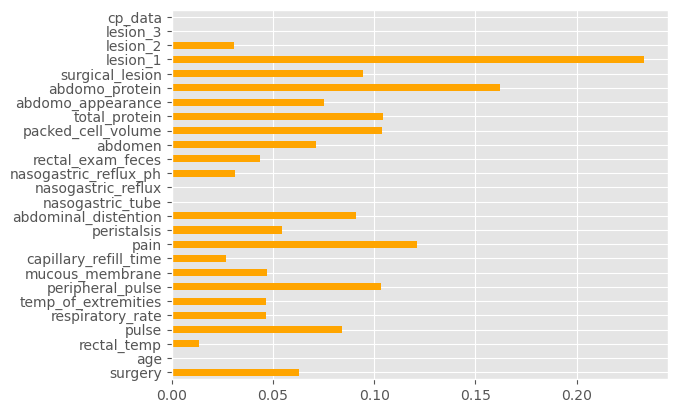

In [10]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(x,y)
feature_impor=pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind="barh",color="orange")
plt.show()

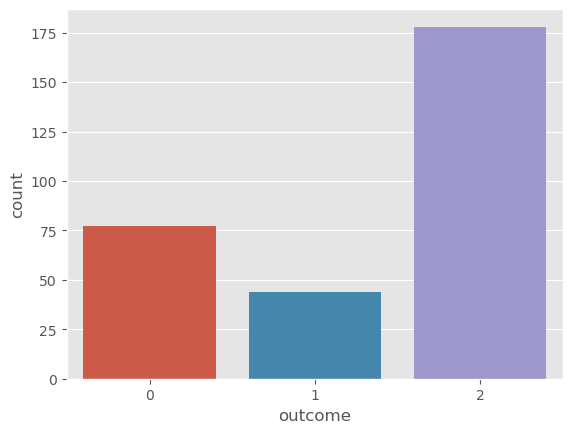

In [11]:
sns.countplot(x="outcome",data=df)
plt.show()

In [12]:
class_percentage=df["outcome"].value_counts(normalize=True)
print(class_percentage)

outcome
2    0.595318
0    0.257525
1    0.147157
Name: proportion, dtype: float64


In [13]:
##how to balance the data set
from sklearn.utils import resample
df_0=df[df["outcome"]==0]
df_1=df[df["outcome"]==1]
df_2=df[df["outcome"]==2]
## seperate the original dataset into three seperate DataFrame
## based on the values in the "outcome" columns

df0_sam=resample(df_0, n_samples=2000)
df1_sam=resample(df_1, n_samples=2000)
df2_sam=resample(df_2, n_samples=2000)

## apply the resample function to each specific DataFrame (df_0, df_1 and df_2)
## this step involves rndomy selecing 2000 samples from each class with replacement.

df=pd.concat([df0_sam, df1_sam, df2_sam])
df=df.sample(frac=1, ignore_index=True)
## shuffle the row of the concatenated DataFrame (df). this is important to ensure that the order
##of samples doesn't nias the training process.

In [14]:
## confirmation of the balance dataset.
class_distric=df["outcome"].value_counts()
print(class_distric)

outcome
2    2000
0    2000
1    2000
Name: count, dtype: int64


In [15]:
class_percentage=df["outcome"].value_counts(normalize=True)
print(class_percentage)

outcome
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64


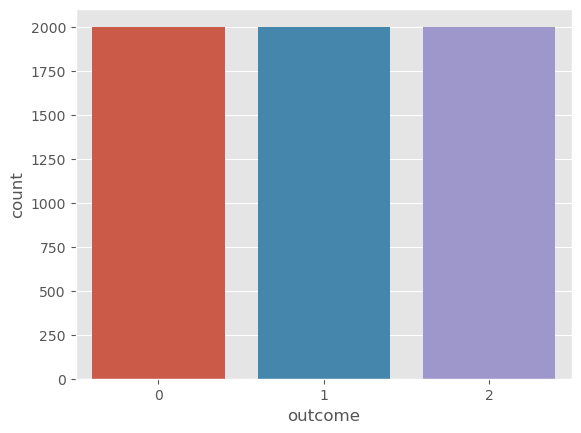

In [16]:
sns.countplot(x="outcome",data=df)
plt.show()

In [17]:
x=df.drop(["outcome"],axis=1)## splitting x AND Y
y=df["outcome"]

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.20,random_state=1)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pipelines= {
    "KNeighbors": Pipeline([("scaler", StandardScaler()), ("classifier",KNeighborsClassifier())]),
    "DecisionTree": Pipeline([("classifier", DecisionTreeClassifier())]),
    "LogisticRegression":Pipeline([("scaler",StandardScaler()), ("classifier",LogisticRegression())]),
}
for name, pipeline in pipelines.items():
    scores= cross_val_score(pipeline,x,y, cv=5, scoring="accuracy")
    print(f"{name}: mean Accuracy={scores.mean()}, Standard Deviation={scores.std()}")


KNeighbors: mean Accuracy=0.9995, Standard Deviation=0.0009999999999999788
DecisionTree: mean Accuracy=1.0, Standard Deviation=0.0
LogisticRegression: mean Accuracy=0.7105, Standard Deviation=0.016663332999933295


In [50]:
logreg=LogisticRegression(solver="newton-cholesky")
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cholesky')

In [55]:
pred1=logreg.predict(xtest)
pred1


array([1, 0, 0, ..., 0, 1, 2])

<Axes: >

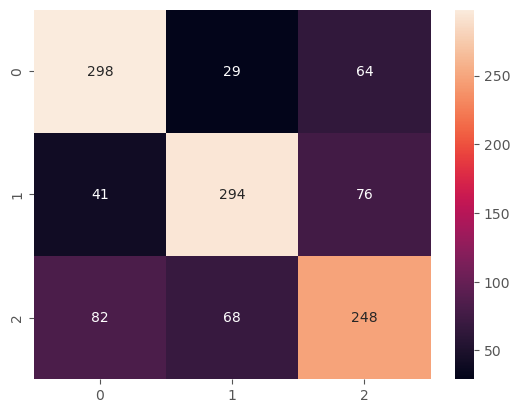

In [56]:
cm=confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [70]:
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

<Axes: >

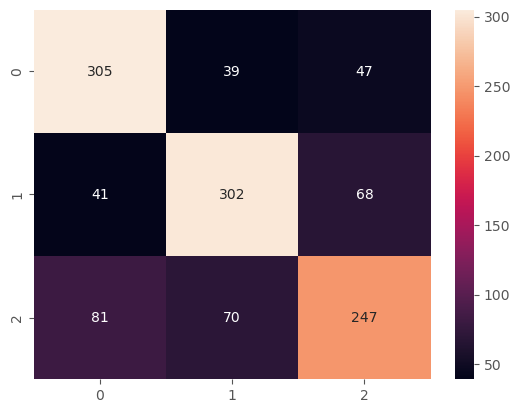

In [72]:
cm=confusion_matrix(ytest,pred2)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [ ]:
pred2=neighbor.predict(xtest)
pred2

In [31]:
cm=confusion_matrix(ytest,pred2)
sns.heatmap(cm,annot=True,fmt="0.5g")

NameError: name 'pred2' is not defined

In [66]:
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [67]:
pred3=tree.predict(xtest)
pred3



array([1, 0, 0, ..., 0, 0, 2])

<Axes: >

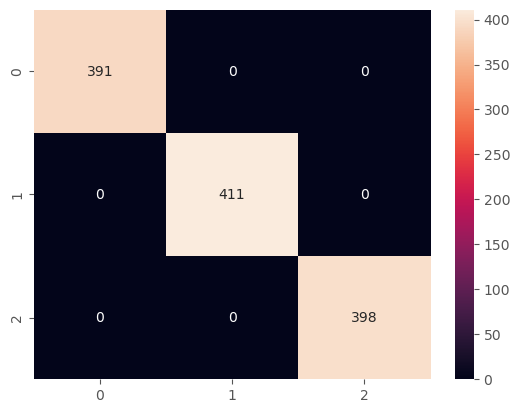

In [68]:
cm=confusion_matrix(ytest,pred3)
sns.heatmap(cm,annot=True,fmt="0.5g")